In [35]:
import argparse
import os
import random
import shutil
import time
import warnings

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import numpy as np 
import torch.nn.functional as F
import scipy as sp
import h5py
import numpy as np
from scipy.ndimage.filters import correlate
from hmax_models.hmax import *

In [36]:
n_ori=4
classes = 60 
model = HMAX(n_ori=n_ori,number_class=classes)

In [37]:
checkpoint = torch.load('model_ckpt/model_hmax_88.pth',map_location=torch.device('cpu'))

In [38]:
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in checkpoint['state_dict'].items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v

In [39]:

model.load_state_dict(new_state_dict)
model.eval()

HMAX(
  (s1): S1(
    (s_7): Conv2d(3, 4, kernel_size=(7, 7), stride=(1, 1), padding=valid)
    (s_uniform_7): Conv2d(3, 4, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (s_9): Conv2d(3, 4, kernel_size=(9, 9), stride=(1, 1), padding=valid)
    (s_uniform_9): Conv2d(3, 4, kernel_size=(9, 9), stride=(1, 1), bias=False)
    (s_11): Conv2d(3, 4, kernel_size=(11, 11), stride=(1, 1), padding=valid)
    (s_uniform_11): Conv2d(3, 4, kernel_size=(11, 11), stride=(1, 1), bias=False)
    (s_13): Conv2d(3, 4, kernel_size=(13, 13), stride=(1, 1), padding=valid)
    (s_uniform_13): Conv2d(3, 4, kernel_size=(13, 13), stride=(1, 1), bias=False)
    (s_15): Conv2d(3, 4, kernel_size=(15, 15), stride=(1, 1), padding=valid)
    (s_uniform_15): Conv2d(3, 4, kernel_size=(15, 15), stride=(1, 1), bias=False)
    (s_17): Conv2d(3, 4, kernel_size=(17, 17), stride=(1, 1), padding=valid)
    (s_uniform_17): Conv2d(3, 4, kernel_size=(17, 17), stride=(1, 1), bias=False)
    (s_19): Conv2d(3, 4, kernel_size=(19

In [78]:
valdir = os.path.join("/users/irodri15/data/irodri15/Brainscore/serre_repos/HMAX/dataset/baseline_horizontal_50_50/", "test/")

In [79]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
val_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(valdir, transforms.Compose([
            transforms.Resize(224),
            #transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=10, shuffle=False,
        num_workers=1, pin_memory=True)

In [80]:
import glob 
import os

In [81]:
os.path.join(valdir,'trw11x/*.png')

'/users/irodri15/data/irodri15/Brainscore/serre_repos/HMAX/dataset/baseline_horizontal_50_50/test/trw11x/*.png'

In [47]:
files = glob.glob(os.path.join(valdir,'trw11x/*.png'))
from PIL import Image
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform
        
    def get_class_label(self, image_name):    
        
        return image_name 
        
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        x = Image.open(image_path).convert('RGB')
        
        y = image_path.split('/')[-1]
        if self.transform is not None:
            x1 = self.transform(x)
        return x1, y
    
    def __len__(self):
        return len(self.image_paths)

In [48]:
import cv2
images = np.array([cv2.imread(f) for f in files])

In [49]:
images[0].shape

(256, 256, 3)

In [50]:
Image.fromarray(images[0]).convert("RGB").size

(256, 256)

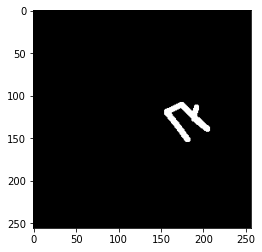

In [51]:
plt.imshow(images[0])

In [59]:
images.shape

(96, 256, 256, 3)

In [72]:
files.sort()
files=[files[i] for i in range(len(files)) if i%5!=0 ]
dataset = MyDataset(files,transforms.Compose([
            transforms.Resize(224),
            #transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ]))
dataset[0][0].shape

torch.Size([3, 224, 224])

In [73]:
import torchvision.datasets as datasets

In [74]:
val_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=1, shuffle=False,
        num_workers=1, pin_memory=True)

In [76]:
train_loader = torch.utils.data.DataLoader(
        dataset, batch_size=1, shuffle=False,
         pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_101.png',)


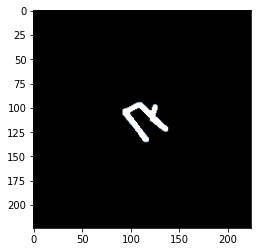

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_102.png',)


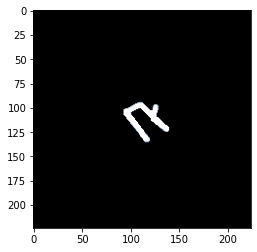

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_103.png',)


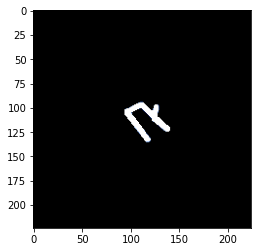

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_104.png',)


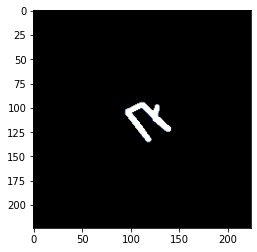

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_106.png',)


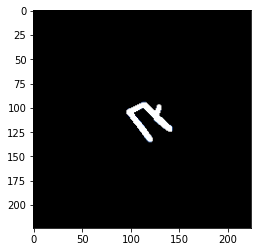

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_107.png',)


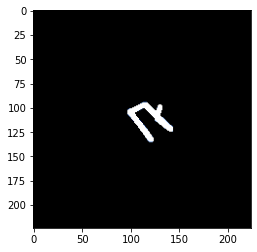

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_108.png',)


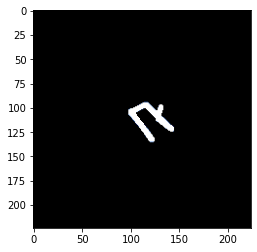

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_109.png',)


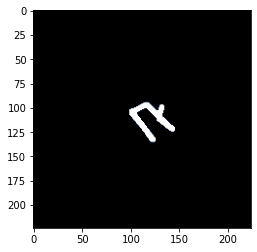

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_111.png',)


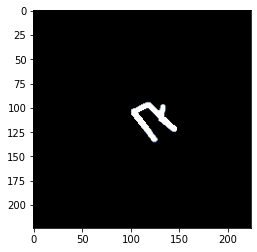

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_112.png',)


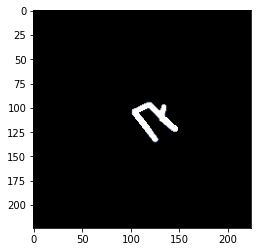

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_114.png',)


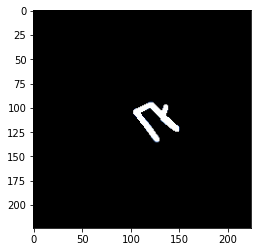

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_116.png',)


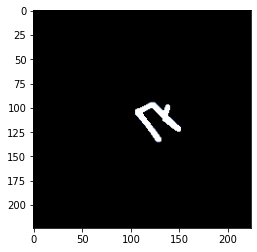

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_117.png',)


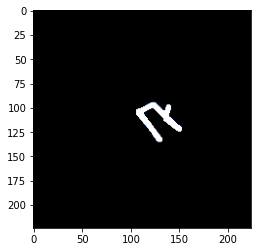

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_118.png',)


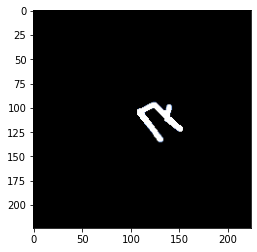

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_119.png',)


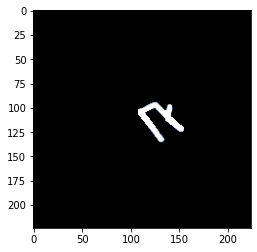

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_121.png',)


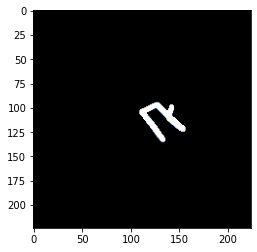

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_122.png',)


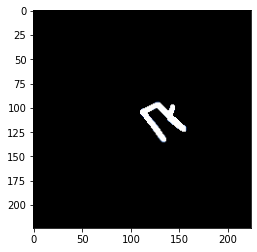

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_123.png',)


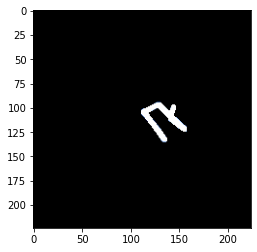

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_124.png',)


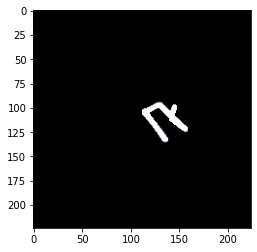

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_127.png',)


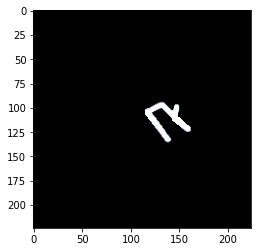

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_128.png',)


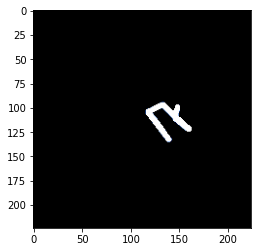

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_129.png',)


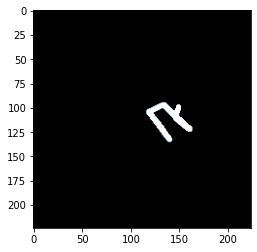

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_131.png',)


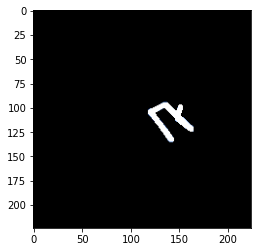

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_132.png',)


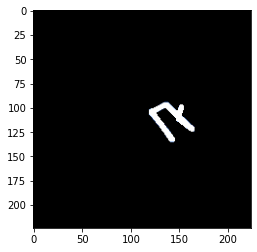

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_133.png',)


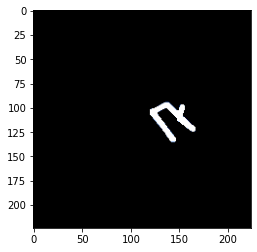

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_134.png',)


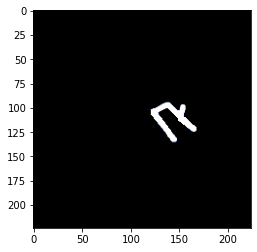

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_136.png',)


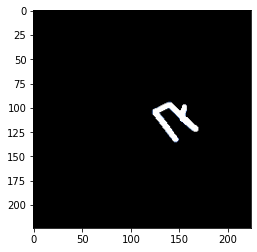

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_137.png',)


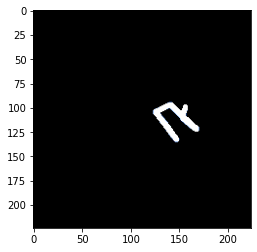

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_139.png',)


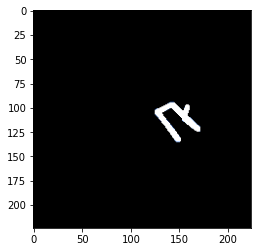

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_141.png',)


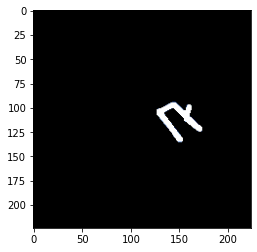

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_142.png',)


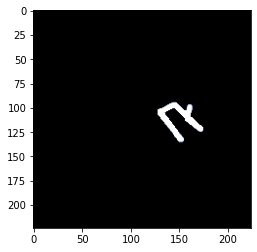

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_143.png',)


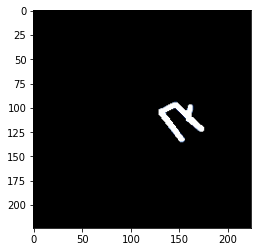

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_144.png',)


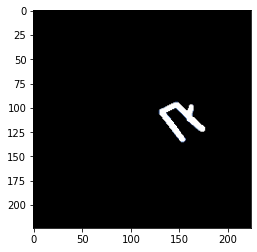

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_146.png',)


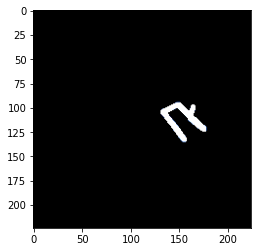

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_147.png',)


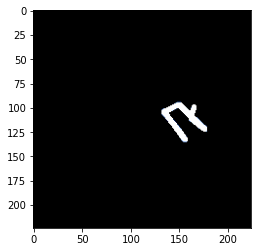

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_148.png',)


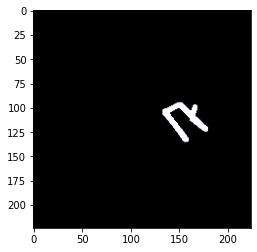

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_149.png',)


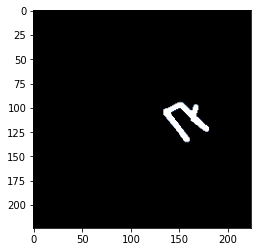

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_152.png',)


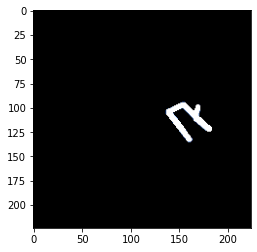

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_153.png',)


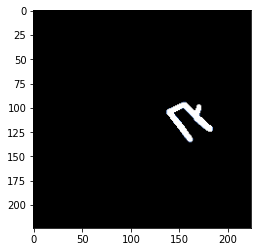

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_154.png',)


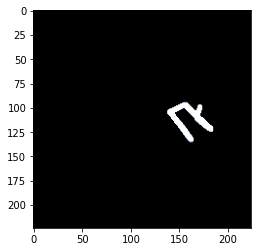

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_156.png',)


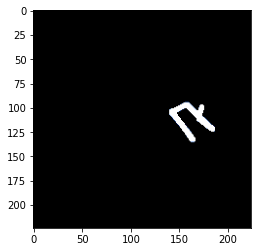

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_157.png',)


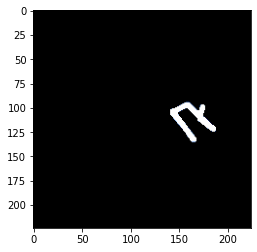

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_158.png',)


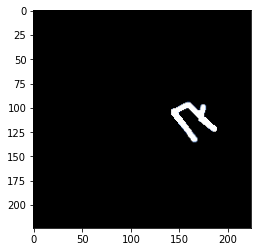

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_159.png',)


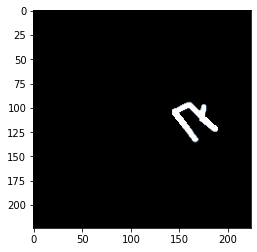

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_161.png',)


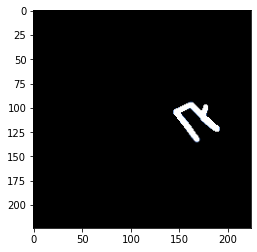

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_162.png',)


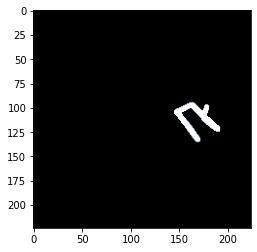

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_164.png',)


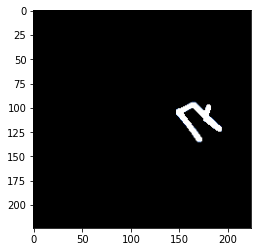

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_166.png',)


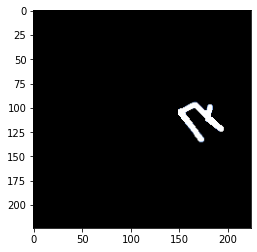

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_167.png',)


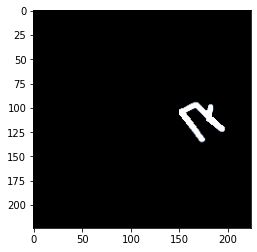

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_168.png',)


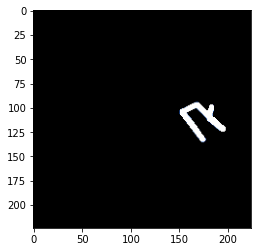

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_169.png',)


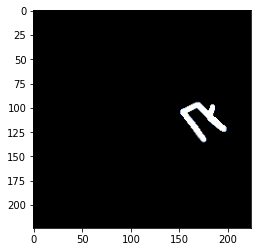

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_171.png',)


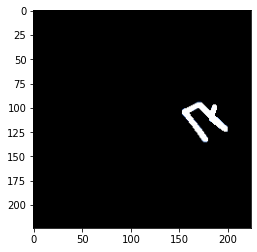

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_172.png',)


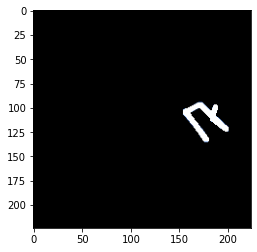

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_173.png',)


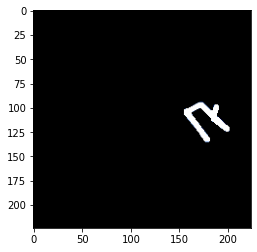

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_174.png',)


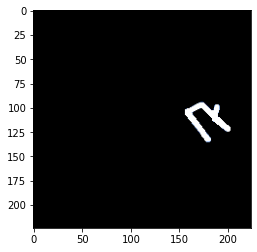

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_177.png',)


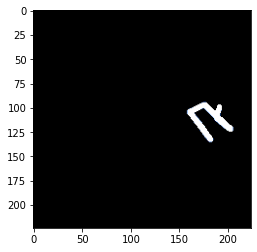

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_178.png',)


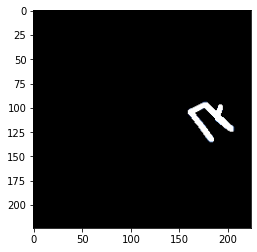

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_179.png',)


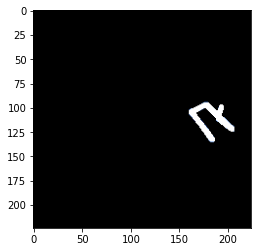

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_181.png',)


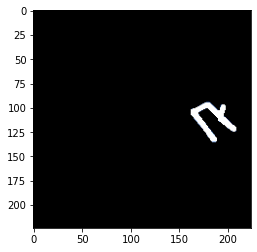

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_182.png',)


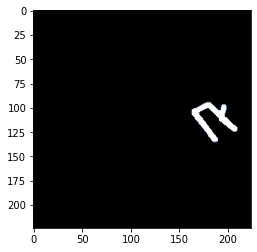

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_183.png',)


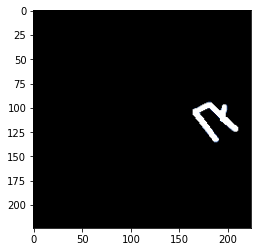

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_184.png',)


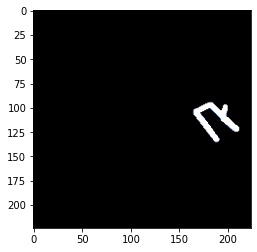

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_186.png',)


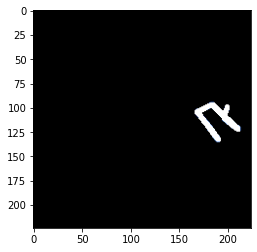

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_187.png',)


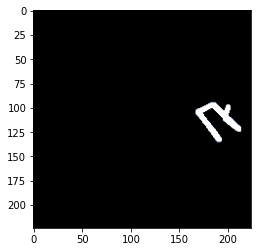

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_189.png',)


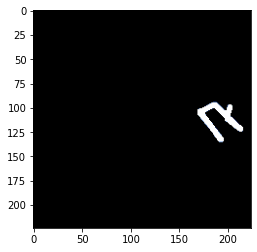

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


58 ('trw11x_0x_191.png',)


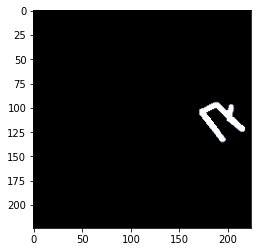

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_96.png',)


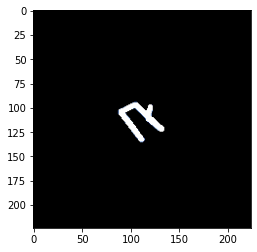

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_97.png',)


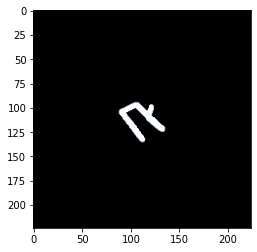

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 ('trw11x_0x_98.png',)


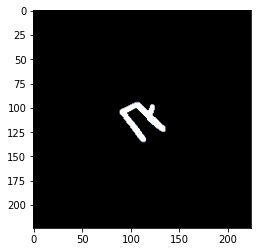

In [77]:
model.eval()
with torch.no_grad():
     for i, (imgs, target) in enumerate(train_loader):
        #imgs,target = dataset[i]
        if i!=0  and i%10==0:continue
        #input= torch.tensor(images,dtype=torch.int16)
        output= model(imgs)
        print(torch.argmax(output).numpy(),target)
        img = np.transpose(imgs[0].numpy(),(1,2,0))
        plt.imshow(img)
        #plt.title(target)
        plt.show()

In [230]:
imgs.shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


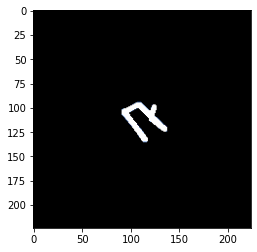

In [66]:
import torchvision
images = torchvision.transforms.functional.to_tensor(
    images.values.astype(np.uint8).reshape((1, 16, 16))
)

NameError: name 'torchvision' is not defined

In [9]:
import glob,cv2
import matplotlib.pyplot as plt

/cifs/data/tserre_lrs/projects/prj_hmax/data/mnist_scale/scale1/train/4/33787.jpg


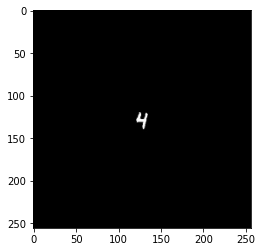

In [26]:
images = glob.glob('/cifs/data/tserre_lrs/projects/prj_hmax/data/mnist_scale/scale1/train/4/*jpg')
ix = 2
img = cv2.imread(images[ix])
print(images[ix])
plt.imshow(img)

/cifs/data/tserre_lrs/projects/prj_hmax/data/mnist_scale/scale6/train/4/33787.jpg


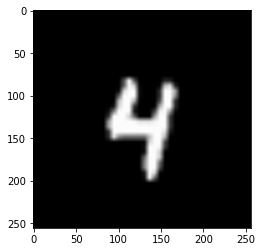

In [25]:
images = glob.glob('/cifs/data/tserre_lrs/projects/prj_hmax/data/mnist_scale/scale6/train/4/*jpg')
ix = 2
img = cv2.imread(images[ix])
print(images[ix])
plt.imshow(img)

In [33]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                        help='learning rate (default: 1.0)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='Learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
    dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")

In [34]:
main()

usage: ipykernel_launcher.py [-h] [--batch-size N] [--test-batch-size N]
                             [--epochs N] [--lr LR] [--gamma M] [--no-cuda]
                             [--dry-run] [--seed S] [--log-interval N]
                             [--save-model]
ipykernel_launcher.py: error: unrecognized arguments: -f /gpfs/home/irodri15/.local/share/jupyter/runtime/kernel-dfa6f8f7-2ac3-4c2d-9420-c8416a4ec56c.json


SystemExit: 2

/users/irodri15/anaconda/jupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
